# Principal Component Analysis (PCA)

**The aim of PCA is to determine a few linear combinations of the original variables that can be used to summarize the data set without losing much information.**

PCA can be used to explore patterns in the data and/or dimensionally reduction.


## Initializations

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from codefiles.datagen import random_xy, x_plus_noise, data_3d
from codefiles.dataplot import plot_principal_components, plot_3d, plot_2d
# %matplotlib inline
%matplotlib notebook

# Principal Component Analysis (PCA)
The best way to fully understand PCA is to see it in action. Let's evaluate the PCA with three different types of data:  
1) Random 2D Data  
2) Correlated 2D Data  
3) Correlated 3D Data  

## PCA with Random 2D Data
Totally random data. Generate a 2D dataset)

<IPython.core.display.Javascript object>


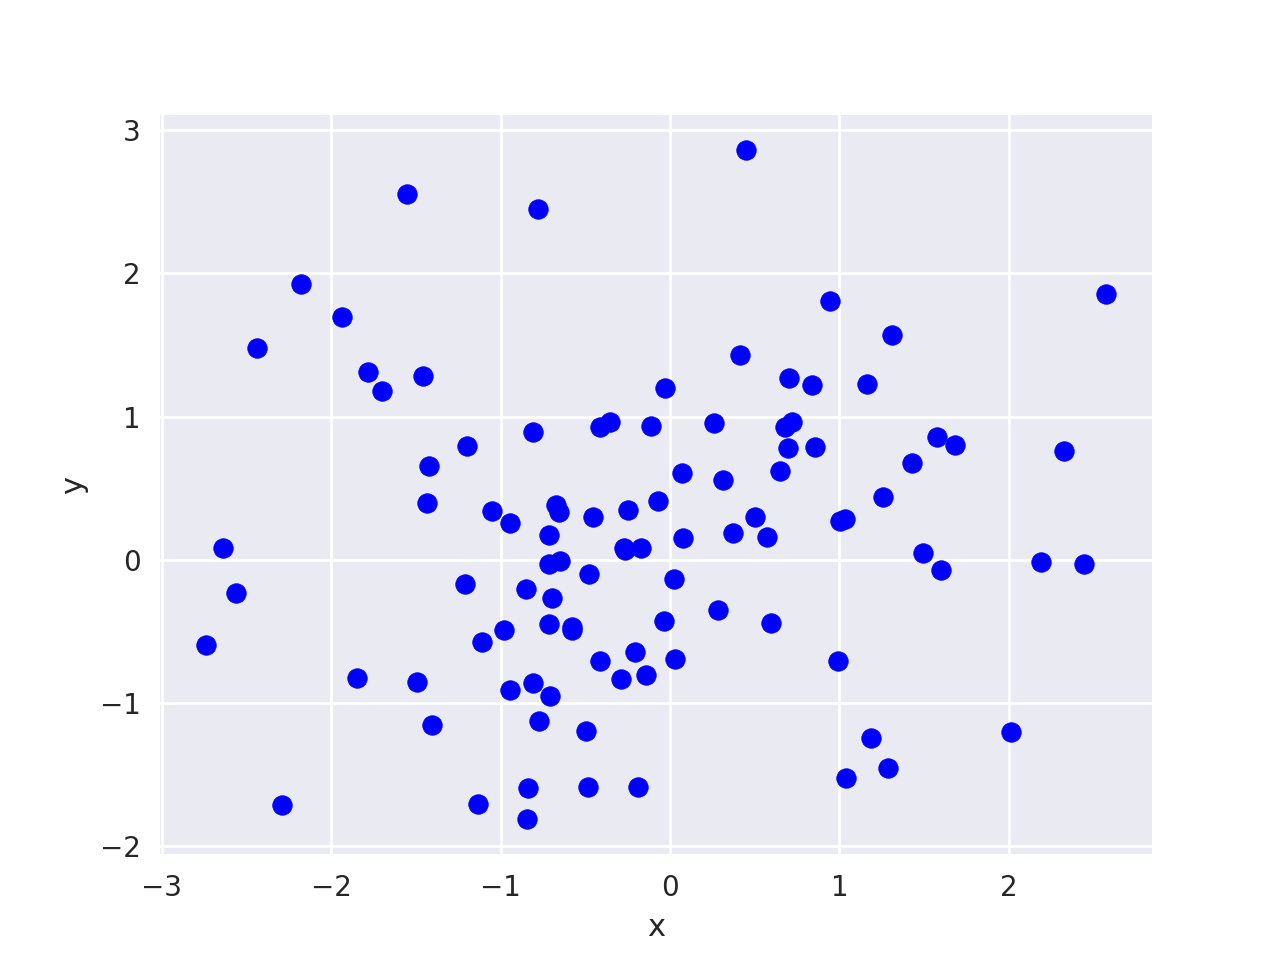

In [2]:
data_random = random_xy(num_points=100)
plot_2d(data_random)

Initialize PCA - recall that we won't need any kind of target column since this is an unsupervised technique.

In [3]:
pca_random = PCA()

Now, let's give it the random data.

In [4]:
pca_random.fit(data_random)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

And evaluate the variance of the data. Will we have some axis with significant more variance?

In [5]:
pca_random.explained_variance_

array([ 1.08363374,  0.92732929])

As we can see, there is not a huge difference in variance between the two axis. It was expected. If we increase `num_points` in the `random_xy()`, we'll see them closer together.

## Correlated 2D Data
We'll now assess a correlated dataset.

<IPython.core.display.Javascript object>


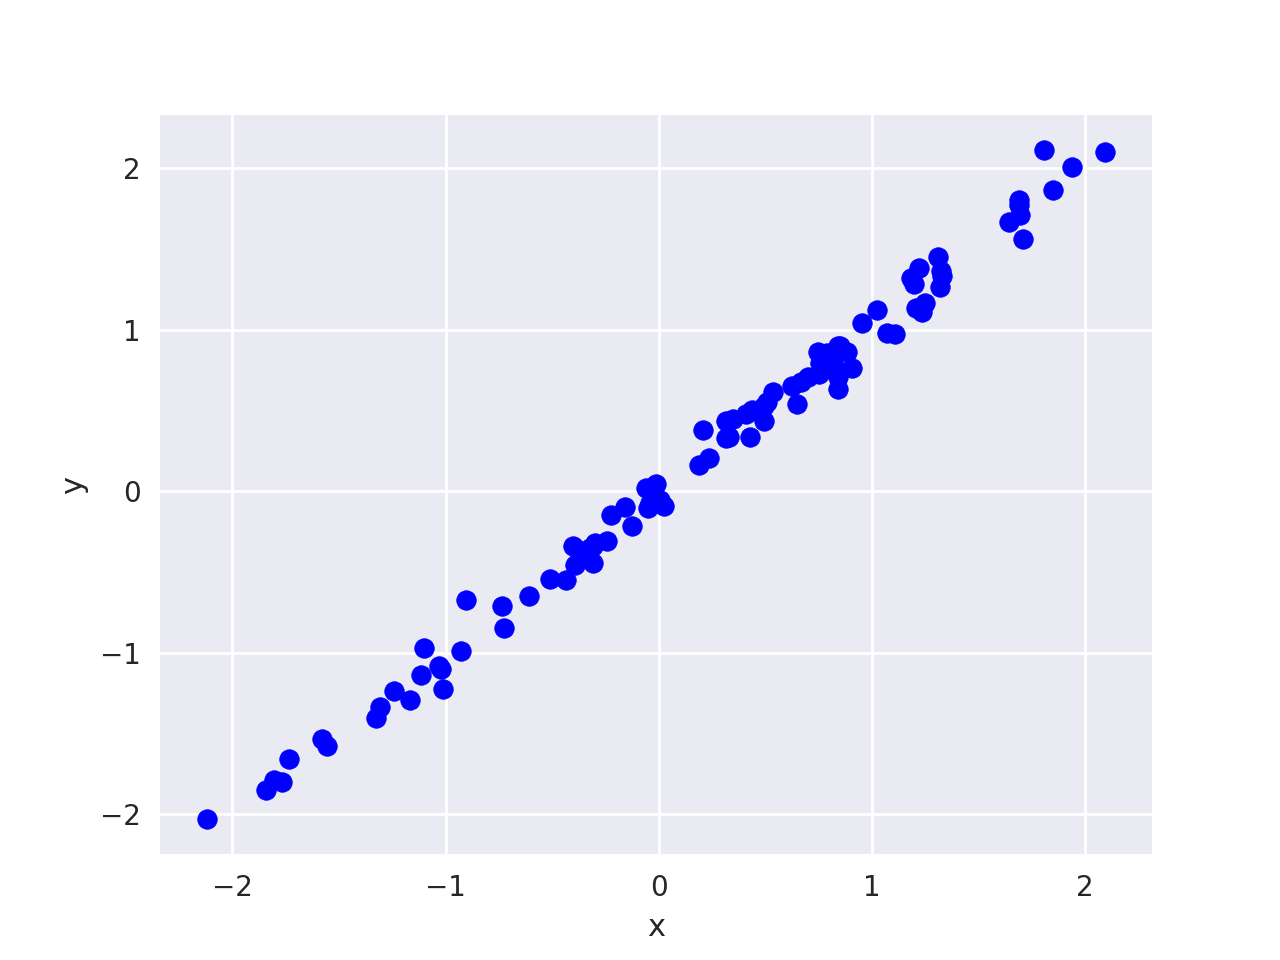

In [5]:
# Correlated data
data_correlated = x_plus_noise(slope=1)
plot_2d(data_correlated)

Initialize and fit the correlated data.

In [49]:
pca_correlated = PCA()
pca_correlated.fit(data_correlated)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [50]:
pca_correlated.explained_variance_

array([ 1.81451155,  0.00472892])

Now we can see a principal component with a significant higher magnitude than the other one. There's definitely some knowledge we can use about this, e.g., use only one dimensional data if we have/need to, without losing much information.  

**Hint**: check `x_plus_noise()` with `slope=-1`.

## 3D Correlated Data
Now for the most interesting part! Let's use the PCA to actually reduce our data dimensionality (from 3D to 2D). First, generate 3D data: kind of thin surface with some noise.

<IPython.core.display.Javascript object>


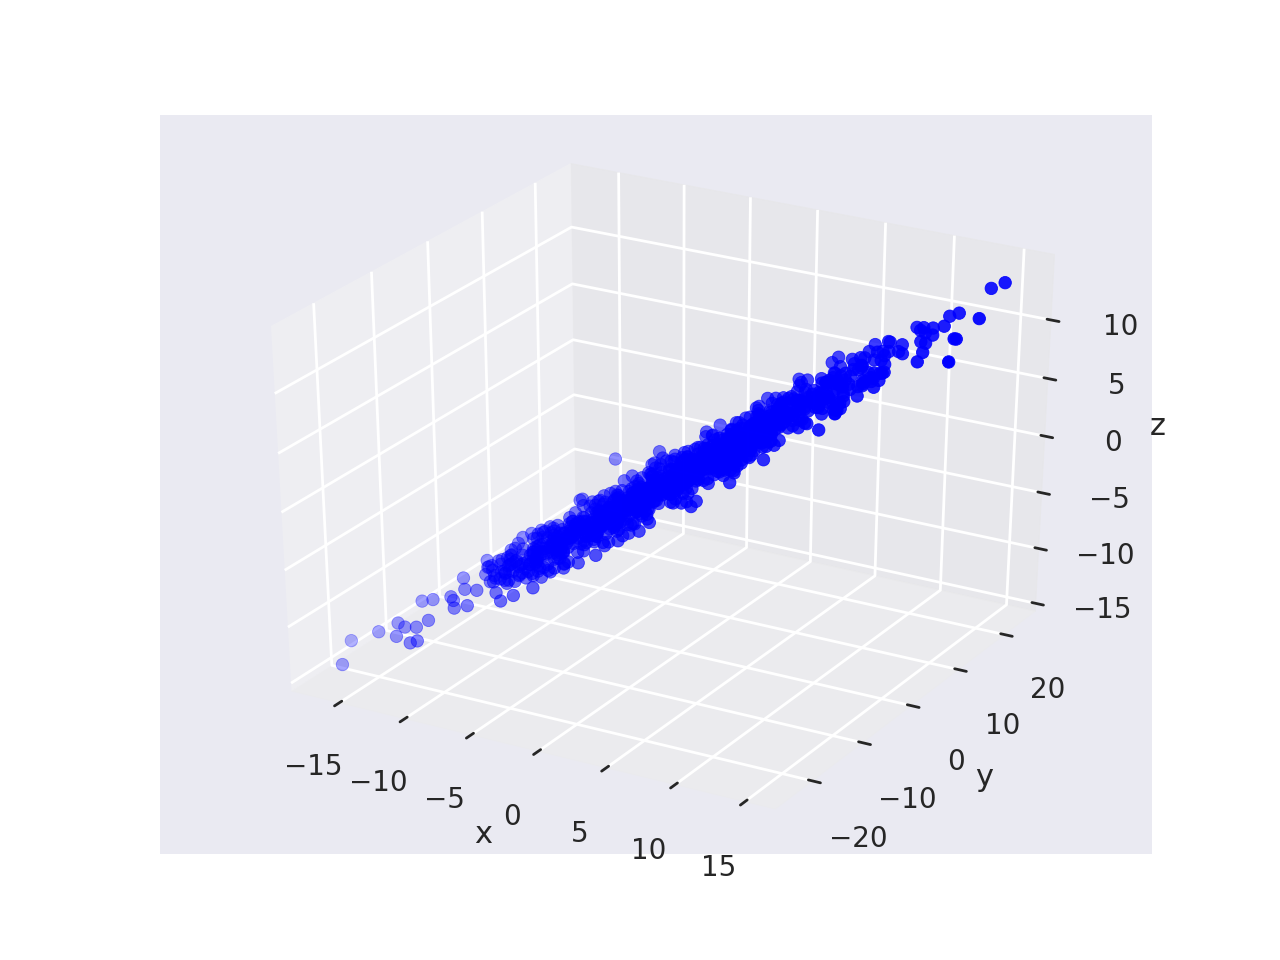

In [40]:
data_3D_corr = data_3d(num_points=1000, randomness=0.01, theta_x=30, theta_z=60)
plot_3d(data_3D_corr)

In [9]:
pca_3d = PCA()
pca_3d.fit(data_3D_corr)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

The variance corresponding to each principal component.

In [11]:
pca_3d.explained_variance_

array([  1.00787369e+02,   1.06261855e+00,   1.05669804e-04])

Check the order of magnitude of difference between the 3. Surely, at least one of the is not rather informative...

<IPython.core.display.Javascript object>


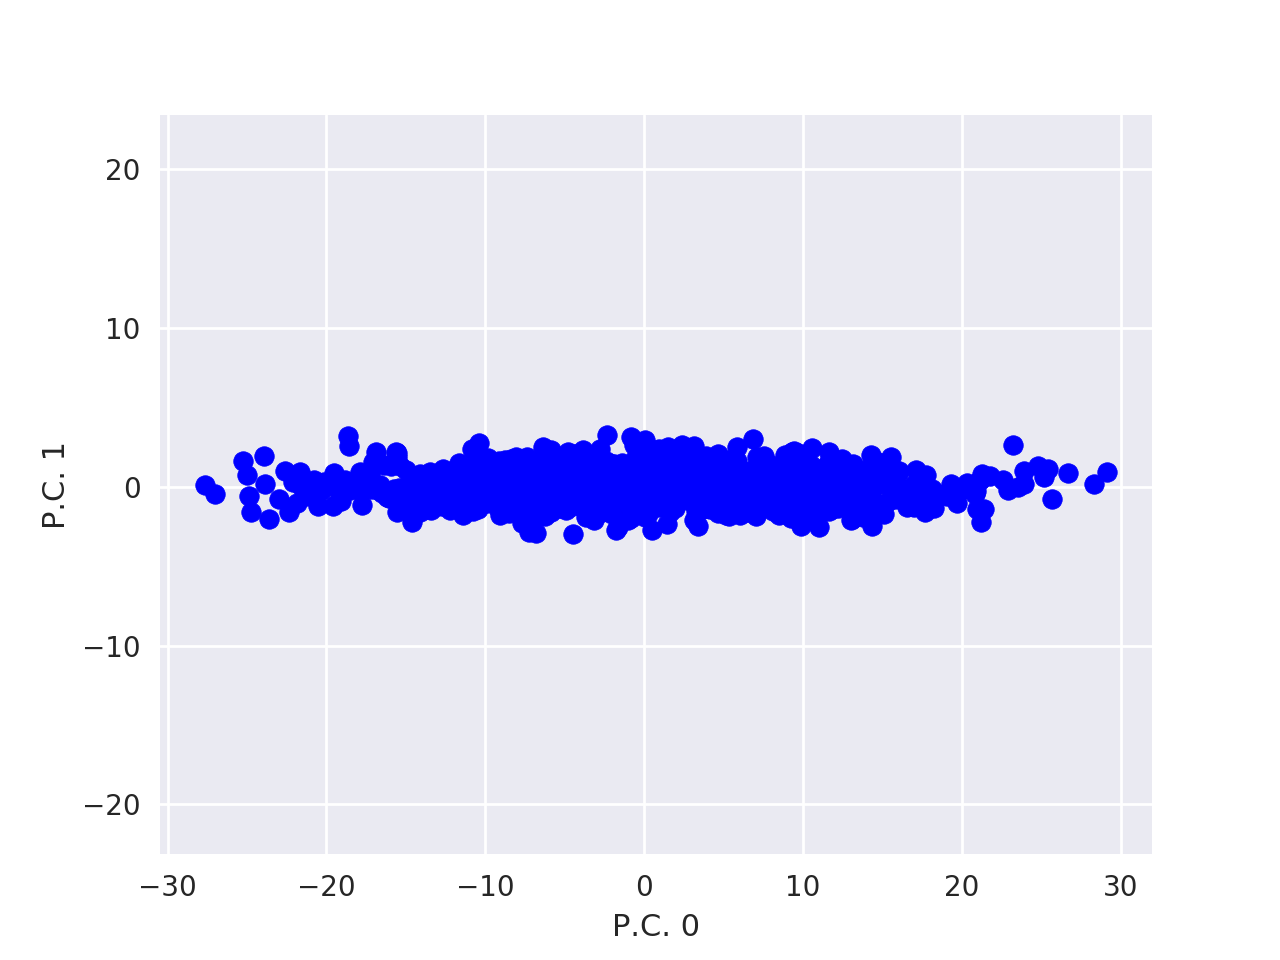

In [22]:
# The most informative (more spread/more variance) view of the data
data_flat = pca_3d.transform(data_3D_corr)
plot_principal_components(data_flat, x1=0, x2=1)
plt.axis('equal')
plt.show()

<IPython.core.display.Javascript object>


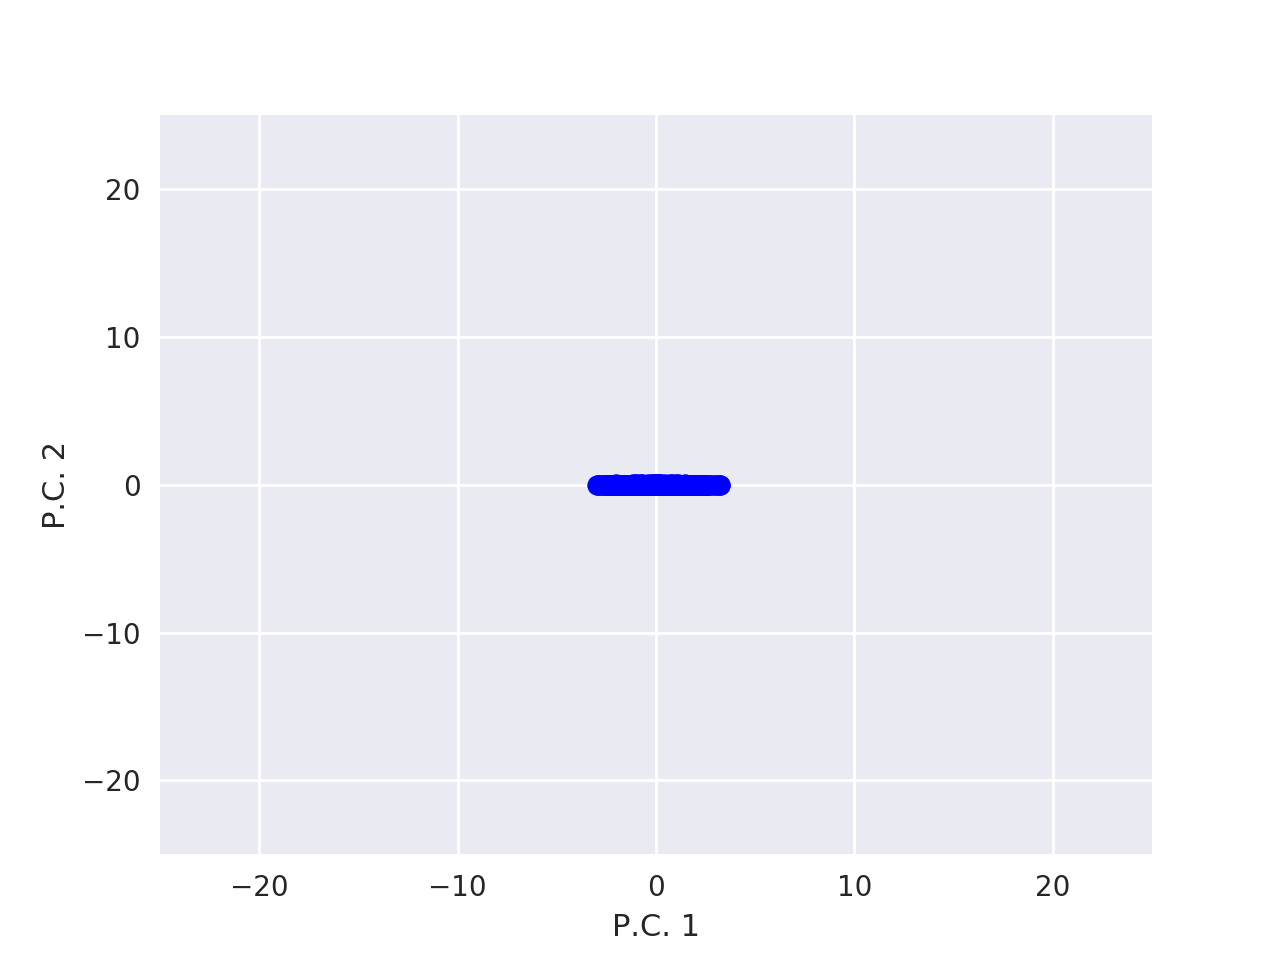

In [26]:
# A less informative (less spread) representation
data_flat = pca_3d.transform(data_3D_corr)
plot_principal_components(data_flat, x1=1, x2=2)
plt.xlim([-25,25])
plt.ylim([-25,25])
plt.show()

So, if we were in a process of dimensionality reduction then we would be able to extract two components without significant loss of information.

# Just out of curiosity...

<IPython.core.display.Javascript object>


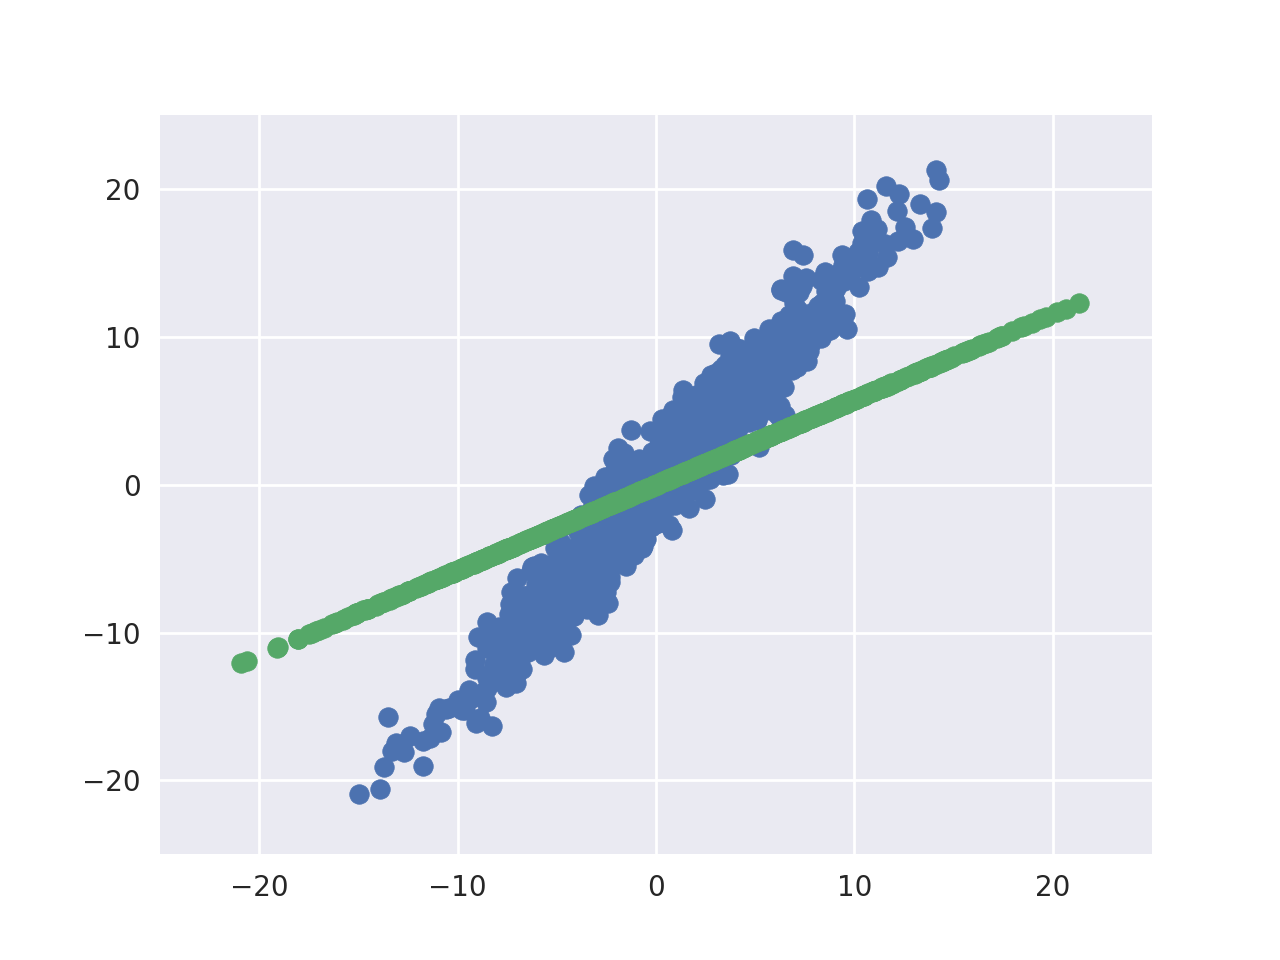

(-25, 25)

In [39]:
# Compare with the original features
plt.scatter(data_3D_corr['x'], data_3D_corr['y'])
plt.xlim([-25,25])
plt.ylim([-25,25])

In [13]:
# The components in terms of the original features/axis
pca.components_

array([[ 0.51188609,  0.74350455,  0.43031803],
       [ 0.85899139, -0.44901724, -0.24600266],
       [-0.01031612, -0.49556482,  0.86850969]])

In [35]:
from codefiles.datagen import _rot_mat_z, _rot_mat_x

theta_x = 30
theta_z = 60

np.dot(_rot_mat_x(theta=np.radians(theta_x)), _rot_mat_z(theta=np.radians(theta_z))).transpose()

array([[ 0.5      ,  0.75     ,  0.4330127],
       [-0.8660254,  0.4330127,  0.25     ],
       [ 0.       , -0.5      ,  0.8660254]])

In [32]:
data = pd.DataFrame({
    'x': np.random.normal(scale=10, size=1000),
    'y': np.random.normal(scale=1, size=1000),
    'z': np.random.normal(scale=0.1, size=1000)
})